I applied the Q-Learning on CartPole-v0 environment. I use a multilayer perceptron to approximate the Q function.
    I tested different hyperparameters and state representations.

    Baseline model:
    - A hidden layer with 32 units
    - 20k as the memory size
    - 200000 frames as the training limit
    - Rmsprop optimizer with lr=0.001
    - For the exploration I used a piecewise schedule. The exploration starts from 1.0 and downs to 0.1 at 40k frames. Then, it downs to 0.01 at 50k frames.
    - Update the target at each 10k frames.

In [2]:
using Seaborn, JLD

INFO: Installing PyQt5 via Anaconda's /home/cano/anaconda2/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/cano/anaconda2:
#
pyqt                      4.11.4                   py27_4  


First, I tested the effect of the history of the observations. I stacked up to 4 observations as the state representation.

In [50]:
frames = nothing
rewards = nothing
stacks = nothing
units = nothing
for i=1:4
    fs, rs = load(string("cartpole_stack",i,"_log_log.jld"), "frames", "rewards")
    if frames == nothing
        frames = fs[100:end]
        rewards = map(t->mean(rs[(t-99):t]), 100:length(fs))
        stacks = split(strip(string("stack#", i, "_mean100 ") ^ length(fs[100:end])))
        units = zeros(length(fs[100:end]),)
    else
        append!(frames,fs[100:end])
        append!(rewards, map(t->mean(rs[(t-99):t]), 100:length(fs)))
        append!(stacks, split(strip(string("stack#", i, "_mean100 ") ^ length(fs[100:end]))))
        append!(units, zeros(length(fs[100:end]),))
    end
end

df = DataFrame(Dict(:frames=>frames, :meanrewards=>rewards, :stack=>stacks, :units=>units));

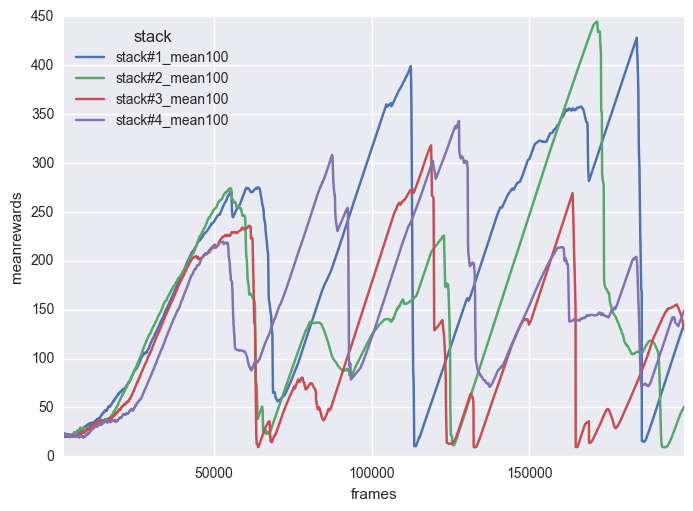

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1df0903090>

In [51]:
tsplot(df; time=:frames, value=:meanrewards, condition=:stack, unit=:units)

The model is not stable. All models gradualy increase the performance while the exploration rate downs to 0.01 at 50k frames. Then, all start to ocilate with different significant. The below figure shows the maximum episode rewards within 100 episodes. The model with stack=1 reaches the maximum reward.

In [52]:
frames = nothing
rewards = nothing
stacks = nothing
units = nothing
for i=1:4
    fs, rs = load(string("cartpole_stack",i,"_log_log.jld"), "frames", "rewards")
    if frames == nothing
        frames = fs[100:end]
        rewards = map(t->maximum(rs[(t-99):t]), 100:length(fs))
        stacks = split(strip(string("stack#", i, "_max100 ") ^ length(fs[100:end])))
        units = zeros(length(fs[100:end]),)
    else
        append!(frames,fs[100:end])
        append!(rewards, map(t->maximum(rs[(t-99):t]), 100:length(fs)))
        append!(stacks, split(strip(string("stack#", i, "_max100 ") ^ length(fs[100:end]))))
        append!(units, zeros(length(fs[100:end]),))
    end
end

df = DataFrame(Dict(:frames=>frames, :meanrewards=>rewards, :stack=>stacks, :units=>units));

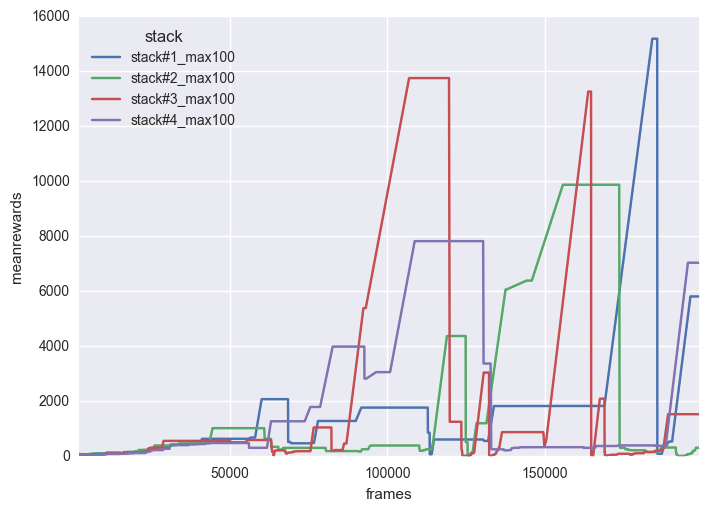

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1dadbb5b90>

In [53]:
tsplot(df; time=:frames, value=:meanrewards, condition=:stack, unit=:units)

I also investigated the effect of the size of the replay buffer. It helps for the stability, however if the model reaches a bad point, it takes more time to recover this situation.

In [54]:
frames = nothing
rewards = nothing
stacks = nothing
units = nothing
for i=[1,2,10,20,50,100]
    fs, rs = load(string("cartpole_stack4_m",i,"k_log.jld"), "frames", "rewards")
    if frames == nothing
        frames = fs[100:end]
        rewards = map(t->mean(rs[(t-99):t]), 100:length(fs))
        stacks = split(strip(string("m#", i, "_mean100 ") ^ length(fs[100:end])))
        units = zeros(length(fs[100:end]),)
    else
        append!(frames,fs[100:end])
        append!(rewards, map(t->mean(rs[(t-99):t]), 100:length(fs)))
        append!(stacks, split(strip(string("m#", i, "_mean100 ") ^ length(fs[100:end]))))
        append!(units, zeros(length(fs[100:end]),))
    end
end

df = DataFrame(Dict(:frames=>frames, :meanrewards=>rewards, :stack=>stacks, :units=>units));

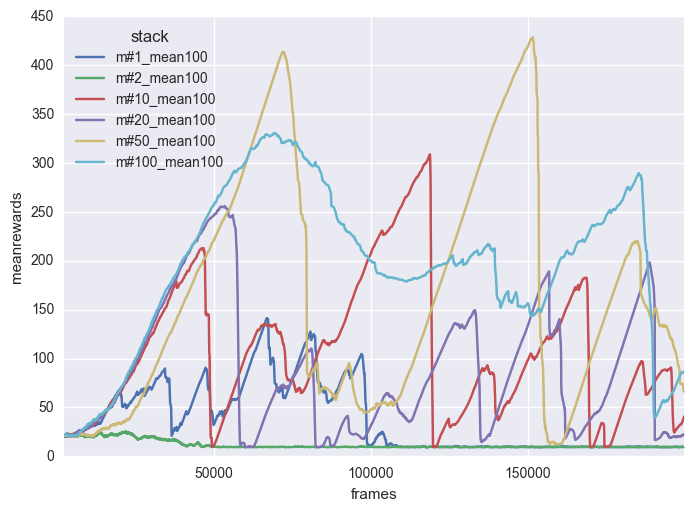

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1dadb12a10>

In [55]:
tsplot(df; time=:frames, value=:meanrewards, condition=:stack, unit=:units)